<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/SentimentAnalysis_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud


In [ ]:
df = pd.read_csv("/content/amazon_cells_labelled.txt", sep= "\t", header = None)
df.head()
df = df.rename(columns={df.columns[0]: 'review'})
df = df.rename(columns={df.columns[1]: 'sen'})

<Axes: ylabel='sen'>

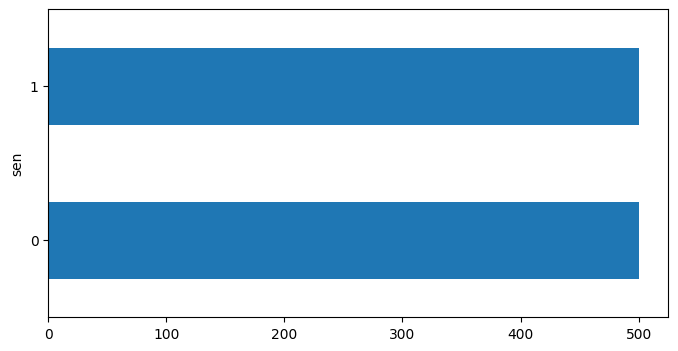

In [ ]:
df.shape
df.sen.value_counts().plot(kind='barh', figsize=(8,4))

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from textwrap import fill
print(fill(', '.join(stopwords.words('english')), width=80))
stop = stopwords.words('english')
df['text_without_sw'] = df['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd,
your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers,
herself, it, it's, its, itself, they, them, their, theirs, themselves, what,
which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be,
been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but,
if, or, because, as, until, while, of, at, by, for, with, about, against,
between, into, through, during, before, after, above, below, to, from, up, down,
in, out, on, off, over, under, again, further, then, once, here, there, when,
where, why, how, all, any, both, each, few, more, most, other, some, such, no,
nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don,
don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't,
couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't,
haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [ ]:
df_sen = df[df["sen"] == 1]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(df_sen['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


In [ ]:
df_ham = df[df["sen"] == 0]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(df_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


In [ ]:
X = df["review"]
y= df["sen"]

In [ ]:
def clean_text(doc):
  document = re.sub('[^a-zA-Z]', ' ', doc)
  document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
  document = re.sub(r'\s+', ' ', document)
  return document


In [ ]:
X_sentences = []
review = list(X)
for rev in review:
  X_sentences.append(clean_text(rev))

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=5,
max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(X_sentences).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)


In [ ]:
y_pred = spam_detector.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
print(X_sentences[56])
print(y[56])
print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))
